# Foundations of AI & ML
## Session 07
### CaseStudy 2






This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Link to dataset used- [Daily Minimum Temperatures](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line)

### Step1: The code below will load the dataset as a Pandas Series

/usr/local/lib/python3.5/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64


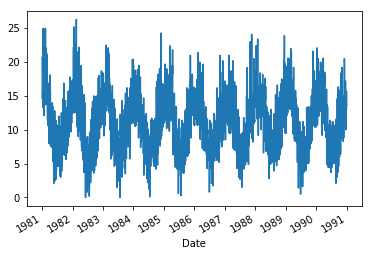

In [2]:
from matplotlib import pyplot
from pandas import Series
series = Series.from_csv('../Datasets/daily-minimum-temperatures-in-me.csv', header=0)
print(series.head())
series.plot()
pyplot.show()


### Step2 : The example below creates a lagged version of the Minimum Daily Temperatures data set
The data takes the previos day (t-1) temp as X and current day( t) temp as Y. You can also take (t-2) temp as X1, (t-1) as X2 so, the data is 2-dimensional and (t) temp as Y

In [36]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 2), columns=list('AB'))
# df1 = df.shift(1)
df1 = df.iloc[:, 0]
# df, pd.concat([df1.shift(1), df.iloc[:, 1]], axis=1)
df1.values.reshape(-1, 1)
pd.concat([df1.shift(1), pd.Series(df1.values)], axis=1)

,A,0
0,NaN,-0.681608
1,-0.681608,0.463774
2,0.463774,0.199379
3,0.199379,-1.126202
4,-1.126202,0.097235


In [37]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.head()

,t-1,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


### Step3 : Splitt the data into train and test

In [38]:
# split into train and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize

X = (dataframe.values[1:,:])
#X = normalize(X)
#print(X)

train, test = shuffle(X[1:len(X)-800]), shuffle(X[len(X)-800:])

train_X, train_y = train[:,0].reshape(-1, 1), train[:,1].reshape(-1, 1)
test_X, test_y = test[:,0].reshape(-1, 1), test[:,1].reshape(-1, 1)

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(2848, 1) (2848, 1)
(800, 1) (800, 1)


### Step4 : Applying LInear regression

In [39]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_y)

# Make predictions using the testing set
pred_y = regr.predict(test_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred_y))
#print(pred_y)

Coefficients: 
 [[0.76542348]]
Mean squared error: 5.98


### Step5: PLot the graph

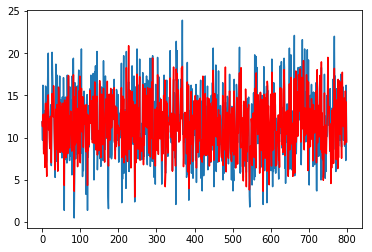

In [40]:
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(pred_y, color='red')
pyplot.show()

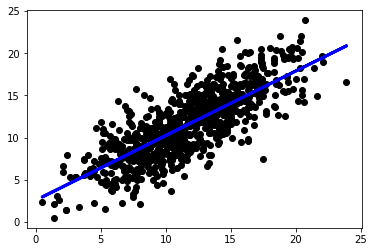

In [41]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, pred_y, color='blue', linewidth=3)
plt.show()

### Step6 : Applying Non-Linear Regression

In [42]:
from sklearn.neural_network import MLPRegressor

In [43]:
clf = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.0001, batch_size=4,
    learning_rate='adaptive',learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=False,
    random_state=2, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)



In [44]:
clf.fit(train_X, train_y)
print(clf.coefs_)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[ 6.10924424e-001, -2.59544006e-001,  2.14842122e-002,
        -1.48716109e-001, -1.46414589e-273,  4.12615192e-001,
        -5.93246462e-001,  6.12569608e-003, -2.78684631e-001,
         2.49616658e-236]]), array([[ 7.18789542e-001],
       [-9.59059288e-001],
       [-7.16260081e-002],
       [-7.30992360e-001],
       [ 9.46542749e-208],
       [ 8.00121372e-001],
       [-8.20665295e-001],
       [-4.65817063e-001],
       [-4.67736781e-001],
       [-2.80081014e-257]])]


In [45]:
# Make predictions using the testing set

pred_y = clf.predict(test_X)
#print(pred_y)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred_y))

Coefficients: 
 [[0.76542348]]
Mean squared error: 5.99


### Step6 : PLot the graph

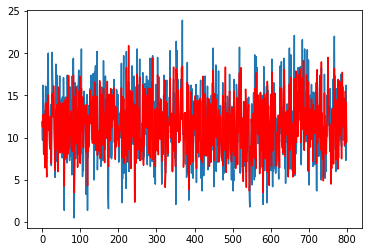

In [46]:
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(pred_y, color='red')
pyplot.show()